In [2]:
%load_ext autoreload
%autoreload 2
import os 
# os.environ['CUDA_LAUNCH_BLOCKING'] = '1'
# os.environ['XLA_PYTHON_CLIENT_MEM_FRACTION']='.85'
os.environ['CUDA_VISIBLE_DEVICES'] = '6'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
import sys
sys.path.append('/home/amawi/projects/nn_ansatz/src')
from nn_ansatz import *
from jax.experimental.optimizers import adam
from jax import tree_util
from tqdm.notebook import trange
from jax import pmap, vmap, grad


In [6]:
# using routines
system = ['LiSolidBCC']
lengths = [12., 18.]
orbitals = ['anisotropic',]
scalar_inputs = [False,]
n_ps = [1,]

e_means = []
for orbital in orbitals:
    for l in lengths:
        name = 'cell_extrapolation_%s_l%.2f' % (orbital, l)
        cfg = setup(system=system[0],
                    n_pre_it=0,
                    n_walkers=512,
                    n_layers=3,
                    n_sh=32,
                    step_size=0.02,
                    n_ph=8,
                    scalar_inputs=False,
                    orbital_decay=orbital,
                    n_periodic_input=1,
                    opt='adam',
                    n_det=4,
                    print_every=100,
                    save_every=2500,
                    lr=1e-4,
                    n_it=5000,
                    name=name)
        cfg['unit_cell_length'] = l
        log = run_vmc(cfg)
        e_mean = log.summary['e_mean_mean']
        e_means.append(e_mean)



s32_p8_l3_det4 adam_1lr-4_1d-3_1nc-4_m512_ cell_extrapolation_anisotropic_l12.00
version 		 081021
seed 		 369
n_devices 		 1
save_every 		 2500
print_every 		 100
exp_dir 		 /home/amawi/projects/nn_ansatz/src/demos/move_atom_positions/lithium_increaseing_cell_size/experiments/LiSolidBCC/081021/cell_extrapolation_anisotropic_l12.00/adam_1lr-4_1d-3_1nc-4_m512_s32_p8_l3_det4/run0
events_dir 		 /home/amawi/projects/nn_ansatz/src/demos/move_atom_positions/lithium_increaseing_cell_size/experiments/LiSolidBCC/081021/cell_extrapolation_anisotropic_l12.00/adam_1lr-4_1d-3_1nc-4_m512_s32_p8_l3_det4/run0/events
models_dir 		 /home/amawi/projects/nn_ansatz/src/demos/move_atom_positions/lithium_increaseing_cell_size/experiments/LiSolidBCC/081021/cell_extrapolation_anisotropic_l12.00/adam_1lr-4_1d-3_1nc-4_m512_s32_p8_l3_det4/run0/models
opt_state_dir 		 /home/amawi/projects/nn_ansatz/src/demos/move_atom_positions/lithium_increaseing_cell_size/experiments/LiSolidBCC/081021/cell_extrapolation_anisotro

training:   0%|          | 1/5001 [00:00<?, ?it/s]

step 100 | e_mean -11.5218 | e_std 4.8080 | e_mean_mean -11.5412 | acceptance 0.6863 | t_per_it 0.1040 |
step 200 | e_mean -12.4416 | e_std 4.8292 | e_mean_mean -12.3936 | acceptance 0.5037 | t_per_it 0.1064 |
step 300 | e_mean -12.9481 | e_std 4.7539 | e_mean_mean -12.9979 | acceptance 0.4988 | t_per_it 0.1073 |
step 400 | e_mean -13.4937 | e_std 4.4320 | e_mean_mean -13.5428 | acceptance 0.4982 | t_per_it 0.1080 |
step 500 | e_mean -14.0528 | e_std 5.2264 | e_mean_mean -13.8378 | acceptance 0.5100 | t_per_it 0.1085 |
step 600 | e_mean -14.2016 | e_std 4.3085 | e_mean_mean -14.3544 | acceptance 0.5004 | t_per_it 0.1090 |
step 700 | e_mean -15.0009 | e_std 5.9065 | e_mean_mean -14.8319 | acceptance 0.5086 | t_per_it 0.1091 |
step 800 | e_mean -15.1789 | e_std 4.4600 | e_mean_mean -15.1636 | acceptance 0.5076 | t_per_it 0.1093 |
step 900 | e_mean -15.7008 | e_std 6.6951 | e_mean_mean -15.4845 | acceptance 0.4959 | t_per_it 0.1094 |
step 1000 | e_mean -15.1862 | e_std 4.4916 | e_mean_mea

training:   0%|          | 1/5001 [00:00<?, ?it/s]

step 100 | e_mean -10.2371 | e_std 5.2027 | e_mean_mean -10.0345 | acceptance 0.7174 | t_per_it 0.1090 |
step 200 | e_mean -10.8758 | e_std 4.3077 | e_mean_mean -11.0169 | acceptance 0.4930 | t_per_it 0.1028 |
step 300 | e_mean -11.8951 | e_std 4.5977 | e_mean_mean -11.7587 | acceptance 0.5057 | t_per_it 0.0997 |
step 400 | e_mean -13.2004 | e_std 5.1244 | e_mean_mean -12.9000 | acceptance 0.4986 | t_per_it 0.0983 |
step 500 | e_mean -12.9623 | e_std 4.8446 | e_mean_mean -13.4188 | acceptance 0.5012 | t_per_it 0.0975 |
step 600 | e_mean -13.9888 | e_std 6.0615 | e_mean_mean -13.8287 | acceptance 0.5049 | t_per_it 0.0967 |
step 700 | e_mean -14.8245 | e_std 7.0946 | e_mean_mean -14.2121 | acceptance 0.5211 | t_per_it 0.0963 |
step 800 | e_mean -15.0219 | e_std 6.2390 | e_mean_mean -14.6765 | acceptance 0.4898 | t_per_it 0.0959 |
step 900 | e_mean -15.5662 | e_std 7.3891 | e_mean_mean -14.9633 | acceptance 0.4986 | t_per_it 0.0957 |
step 1000 | e_mean -15.8084 | e_std 5.2963 | e_mean_mea

[array(-17.98956299), array(-18.72672653)]


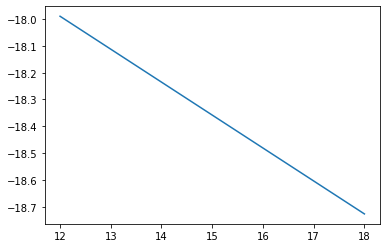

In [7]:
import matplotlib.pyplot as plt
# 2 3 4 5 10
# gpaw_means = [-6.639510, -0.076957, -0.00276, 0.006213]
# gpaw_lengths = [2., 4., 5., 10.]
# ev = 27.2113245
# gpaw_means = [(x -77.136551) / ev for x in gpaw_means]
plt.plot(lengths, e_means)
# plt.plot(gpaw_lengths, gpaw_means)
print(e_means)
plt.show()

In [4]:
log = run_vmc(config)
# save_pk(log.params, 'params.pk')

System: 
 n_atoms = 2 
 n_up    = 3 
 n_down  = 3 
 n_el    = 6 

Ansatz: 
 n_layers = 3 
 n_det    = 4 
 n_sh     = 64 
 n_ph     = 16 

Cell: 
 real_basis: 
 [[6.63 0.   0.  ]
 [0.   6.63 0.  ]
 [0.   0.   6.63]] 
 reciprocal_basis: 
 [[0.94769007 0.         0.        ]
 [0.         0.94769007 0.        ]
 [0.         0.         0.94769007]] 
 real_cut         = 6.00 
 reciprocal_cut   = 6 
 kappa            = 0.50 
 volume           = 291.43 
 min_cell_width   = 6.63 
 n_periodic_input = 1 
 unit_cell_length = 6.63 

converged SCF energy = -12.1628037018806
creating wf
sampling no infs, this could take a while
end sampling no infs


training:   0%|          | 1/7501 [00:00<?, ?it/s]

step 100 | e_mean -9.1831 | e_std 3.3782 | e_mean_mean -9.1150 | acceptance 0.5057 | t_per_it 0.0684 |
step 200 | e_mean -9.6069 | e_std 3.0851 | e_mean_mean -9.4766 | acceptance 0.4895 | t_per_it 0.0685 |
step 300 | e_mean -9.8351 | e_std 2.9581 | e_mean_mean -9.9441 | acceptance 0.5074 | t_per_it 0.0689 |
step 400 | e_mean -10.2764 | e_std 3.1788 | e_mean_mean -10.1491 | acceptance 0.5111 | t_per_it 0.0688 |
step 500 | e_mean -10.8160 | e_std 3.1381 | e_mean_mean -10.5383 | acceptance 0.5025 | t_per_it 0.0687 |


KeyboardInterrupt: 

In [23]:
walkers = None
logger = Logging(**cfg)

keys = rnd.PRNGKey(cfg['seed'])
if bool(os.environ.get('DISTRIBUTE')) is True:
    keys = rnd.split(keys, cfg['n_devices']).reshape(cfg['n_devices'], 2)

mol = SystemAnsatz(**cfg)

vwf = create_wf(mol)
params = initialise_params(mol, keys)
pwf = pmap(create_wf(mol), in_axes=(None, 0))
pwf_grad = grad(lambda x, y: pwf(x, y).sum(), argnums=(0,1))

sampler = create_sampler(mol, vwf)

if cfg['load_pretrain']:
    params, walkers = load_pk(cfg['pre_path'])
elif cfg['pretrain']:
    params, walkers = pretrain_wf(mol, **cfg)

if walkers is None:
    walkers = initialise_walkers(mol, vwf, sampler, params, keys, walkers=walkers)

grad_fn = create_grad_function(mol, vwf)

if cfg['opt'] == 'kfac':
    update, get_params, kfac_update, state = kfac(mol, params, walkers, cfg['lr'], cfg['damping'], cfg['norm_constraint'])
elif cfg['opt'] == 'adam':
    init, update, get_params = adam(cfg['lr'])
    update = jit(update)
    state = init(params)
else:
    exit('Optimiser not available')

steps = trange(1, cfg['n_it']+1, initial=1, total=cfg['n_it']+1, desc='training', disable=None)
step_size = split_variables_for_pmap(cfg['n_devices'], cfg['step_size'])

ke = pmap(create_local_kinetic_energy(vwf), in_axes=(None, 0))
pe = pmap(create_potential_energy(mol), in_axes=(0, None, None))
pmap_compute_ae_vectors_periodic_i = lambda x, y: compute_ae_vectors_periodic_i(x, y, mol.unit_cell_length)
pmap_compute_ae_vectors_periodic_i = pmap(vmap(pmap_compute_ae_vectors_periodic_i, in_axes=(0, None)), in_axes=(0, None))
pmap_compute_ee_vectors_i = pmap(vmap(compute_ee_vectors_i, in_axes=(0,)), in_axes=(0,))



System: 
 n_atoms = 2 
 n_up    = 3 
 n_down  = 3 
 n_el    = 6 

Ansatz: 
 n_layers = 2 
 n_det    = 2 
 n_sh     = 32 
 n_ph     = 8 

Cell: 
 real_basis: 
 [[6.63 0.   0.  ]
 [0.   6.63 0.  ]
 [0.   0.   6.63]] 
 reciprocal_basis: 
 [[0.94769007 0.         0.        ]
 [0.         0.94769007 0.        ]
 [0.         0.         0.94769007]] 
 real_cut         = 6.00 
 reciprocal_cut   = 6 
 kappa            = 0.50 
 volume           = 291.43 
 min_cell_width   = 6.63 
 n_periodic_input = 3 
 unit_cell_length = 6.63 

converged SCF energy = -12.1628037018806
creating wf
creating wf
sampling no infs, this could take a while
end sampling no infs


training:   0%|          | 1/5001 [00:00<?, ?it/s]

In [24]:
for step in steps:
    keys, subkeys = key_gen(keys)

    walkers, acceptance, step_size = sampler(params, walkers, subkeys, step_size)

    gparam, gwalker = pwf_grad(params, walkers)
    # gparam_nan, gwalker_nan = check_if_nan(gparam, 'x'), check_if_nan(gwalker, 'x')

    pote = pe(walkers, mol.r_atoms, mol.z_atoms)
    pote_nan = check_if_nan(pote, 'x')

    kine = ke(params, walkers)
    kine_nan = check_if_nan(kine,'x')

    ae_vectors = pmap_compute_ae_vectors_periodic_i(walkers, mol.r_atoms)
    ee_vectors = pmap_compute_ee_vectors_i(walkers)
    min_im_ee_vectors = apply_minimum_image_convention(ee_vectors, mol.unit_cell_length)
    min_im_ae_vectors = apply_minimum_image_convention(ae_vectors, mol.unit_cell_length)

    if kine_nan:
        print('nan in kinetic')
        break

    grads, e_locs = grad_fn(params, walkers)

    if cfg['opt'] == 'kfac':
        grads, state = kfac_update(step, grads, state, walkers)

    state = update(step, grads, state)
    params = get_params(state)
    # stop = capture_nan(params, 'params', stop)

    steps.set_postfix(E=f'{jnp.mean(e_locs):.6f}')
    steps.refresh()

    logger.log(step,
                opt_state=state,
                params=params,
                e_locs=e_locs,
                acceptance=acceptance[0])

    # if stop:
        # exit()

logger.walkers = walkers

TypeError: isnan requires ndarray or scalar arguments, got <class 'collections.OrderedDict'> at position 0.

In [ ]:
# Pretrain

params, walkers = pretrain_wf(params,
                              wf,
                              wf_orbitals,
                              mol,
                              walkers,
                              n_it=n_pre_it,
                              lr=1e-4,
                              n_eq_it=n_pre_it)

In [10]:
# vmc loop with kfac

grad_fn = create_grad_function(wf, mol)


update, get_params, kfac_update, state = kfac(kfac_wf, wf, mol, params, walkers, d0s,
                                                  lr=lr,
                                                  damping=damping,
                                                  norm_constraint=norm_constraint)


steps = trange(0, n_it, initial=0, total=n_it, desc='training', disable=None)
for step in steps:
    key, subkey = rnd.split(key)

    walkers, acceptance, step_size = sampler(params, walkers, d0s, subkey, step_size)

    grads, e_locs = grad_fn(params, walkers, d0s)

    grads, state = kfac_update(step, grads, state, walkers, d0s)

    state = update(step, grads, state)
    params = get_params(state)

    steps.set_postfix(E=f'{jnp.mean(e_locs):.6f}')
    steps.refresh()
    

print('exit')

exit


In [9]:
# periodic boundaries test

for (name, method) in zip(('LiSolid'), ('kfac')):
    config = setup(system=name,
                   pretrain=True,
                   n_pre_it=501,
                   n_walkers=2048,
                   n_layers=2,
                   n_sh=64,
                   n_ph=16,
                   opt=method,
                   n_det=8,
                   print_every=100,
                   save_every=5000,
                   lr=1e-4,
                   n_it=10000,
                   norm_constraint=1e-4,
                   damping=1e-3,
                   exp=True)

    run_vmc(**config)


Pretrain path does not exist, can't load


NameError: name 'exit' is not defined

In [3]:
config = setup(system='LiSolid',
               pretrain=True,
               n_pre_it=501,
               n_walkers=2048,
               n_layers=2,
               n_sh=64,
               n_ph=16,
               opt='kfac',
               n_det=8,
               print_every=100,
               save_every=5000,
               lr=1e-3,
               n_it=1000,
               norm_constraint=1e-4,
               damping=1e-3,
               exp=True,
               name='sampler_fix')

run_vmc(**config)

version 		 200421
seed 		 369
save_every 		 5000
print_every 		 100
exp_dir 		 /home/xmax/projects/nn_ansatz/src/experiments/LiSolid/sampler_fix/kfac_1lr-3_1d-3_1nc-4_m2048_s64_p16_l2_det8/run4
events_dir 		 /home/xmax/projects/nn_ansatz/src/experiments/LiSolid/sampler_fix/kfac_1lr-3_1d-3_1nc-4_m2048_s64_p16_l2_det8/run4/events
models_dir 		 /home/xmax/projects/nn_ansatz/src/experiments/LiSolid/sampler_fix/kfac_1lr-3_1d-3_1nc-4_m2048_s64_p16_l2_det8/run4/models
opt_state_dir 		 /home/xmax/projects/nn_ansatz/src/experiments/LiSolid/sampler_fix/kfac_1lr-3_1d-3_1nc-4_m2048_s64_p16_l2_det8/run4/models/opt_state
pre_path 		 /home/xmax/projects/nn_ansatz/src/experiments/LiSolid/pretrained/s64_p16_l2_det8_1lr-4_i501.pk
timing_dir 		 /home/xmax/projects/nn_ansatz/src/experiments/LiSolid/sampler_fix/kfac_1lr-3_1d-3_1nc-4_m2048_s64_p16_l2_det8/run4/events/timing
system 		 LiSolid
r_atoms 		 [[0.5 0.5 0.5]]
z_atoms 		 [3.]
n_el 		 3
n_el_atoms 		 [3]
periodic_boundaries 		 True
cell_basis 		 [[-0

training:   0%|          | 0/1000 [00:00<?, ?it/s]

TypeError: div got incompatible shapes for broadcasting: (2048, 3, 3), (2048, 3, 14).